In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = load_diabetes()
df_x = np.array(data.data)
df_y = np.array(data.target)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


<Axes: >

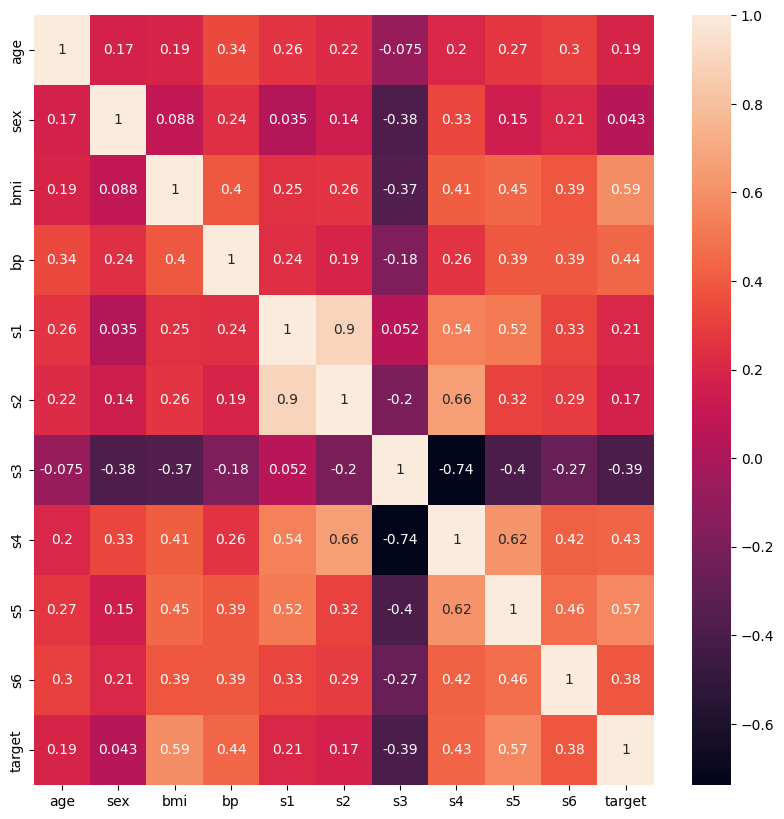

In [ ]:
fig , ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, ax=ax)

In [ ]:
pd.isna(df).sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [ ]:
x_train = np.delete(x_train,[5],axis=1)
x_test = np.delete(x_test,[5],axis=1)

In [ ]:
def loss(X,W,b,y):
  predictions = model(X,W,b)
  L = MSE(predictions.T,y)
  return L

In [ ]:
def MSE(y_pred,y_true):
  return np.mean((y_pred-y_true)**2)

In [ ]:
def model(X,W,b):
  predictions = np.dot(X,W)
  predictions += b
  # print(predictions.shape)
  return predictions


In [ ]:
def gradient(X,W,b,y):
  N = y.shape[0]
  y_preds = model(X,W,b)
  # print(y_preds.shape)
  dW = 2*(1/N)*np.dot(X.T,(y_preds-y))
  db = 2*(y_preds-y).mean()
  return dW,db

In [ ]:
#initial value w,b
W=np.ones(x_train.shape[1])
b=10
#LR
LearningRate = 0.005

In [ ]:
x_train.T.shape

(9, 353)

In [ ]:
losses=[]
for i in range(1,150001):
  dW,db = gradient(x_train,W,b,y_train)
  W -= LearningRate*dW
  b -= LearningRate*db
  L = loss(x_train,W,b,y_train)
  losses.append(L)
  if i % 1000 == 0:
    # print(W.mean(),b.mean())
    print(f'Epoch {i} loss is {L}')

Epoch 1000 loss is 5691.977809395277
Epoch 2000 loss is 5379.659518759701
Epoch 3000 loss is 5110.061800902197
Epoch 4000 loss is 4876.959086850288
Epoch 5000 loss is 4675.049015786898
Epoch 6000 loss is 4499.814856819357
Epoch 7000 loss is 4347.408487021538
Epoch 8000 loss is 4214.550825386645
Epoch 9000 loss is 4098.447117794139
Epoch 10000 loss is 3996.7148568593298
Epoch 11000 loss is 3907.322451276201
Epoch 12000 loss is 3828.5370406437
Epoch 13000 loss is 3758.880091149687
Epoch 14000 loss is 3697.08961114336
Epoch 15000 loss is 3642.087998888227
Epoch 16000 loss is 3592.9546821902613
Epoch 17000 loss is 3548.90283499909
Epoch 18000 loss is 3509.2595627673522
Epoch 19000 loss is 3473.4490391179606
Epoch 20000 loss is 3440.9781535875695
Epoch 21000 loss is 3411.4242959085154
Epoch 22000 loss is 3384.4249581812956
Epoch 23000 loss is 3359.668883838022
Epoch 24000 loss is 3336.888532749759
Epoch 25000 loss is 3315.853666245757
Epoch 26000 loss is 3296.3658850916954
Epoch 27000 loss 

In [ ]:
y_pred = model(x_test,W,b)

In [ ]:
print(MSE(y_pred,y_test))

2866.5849491492954


<Axes: >

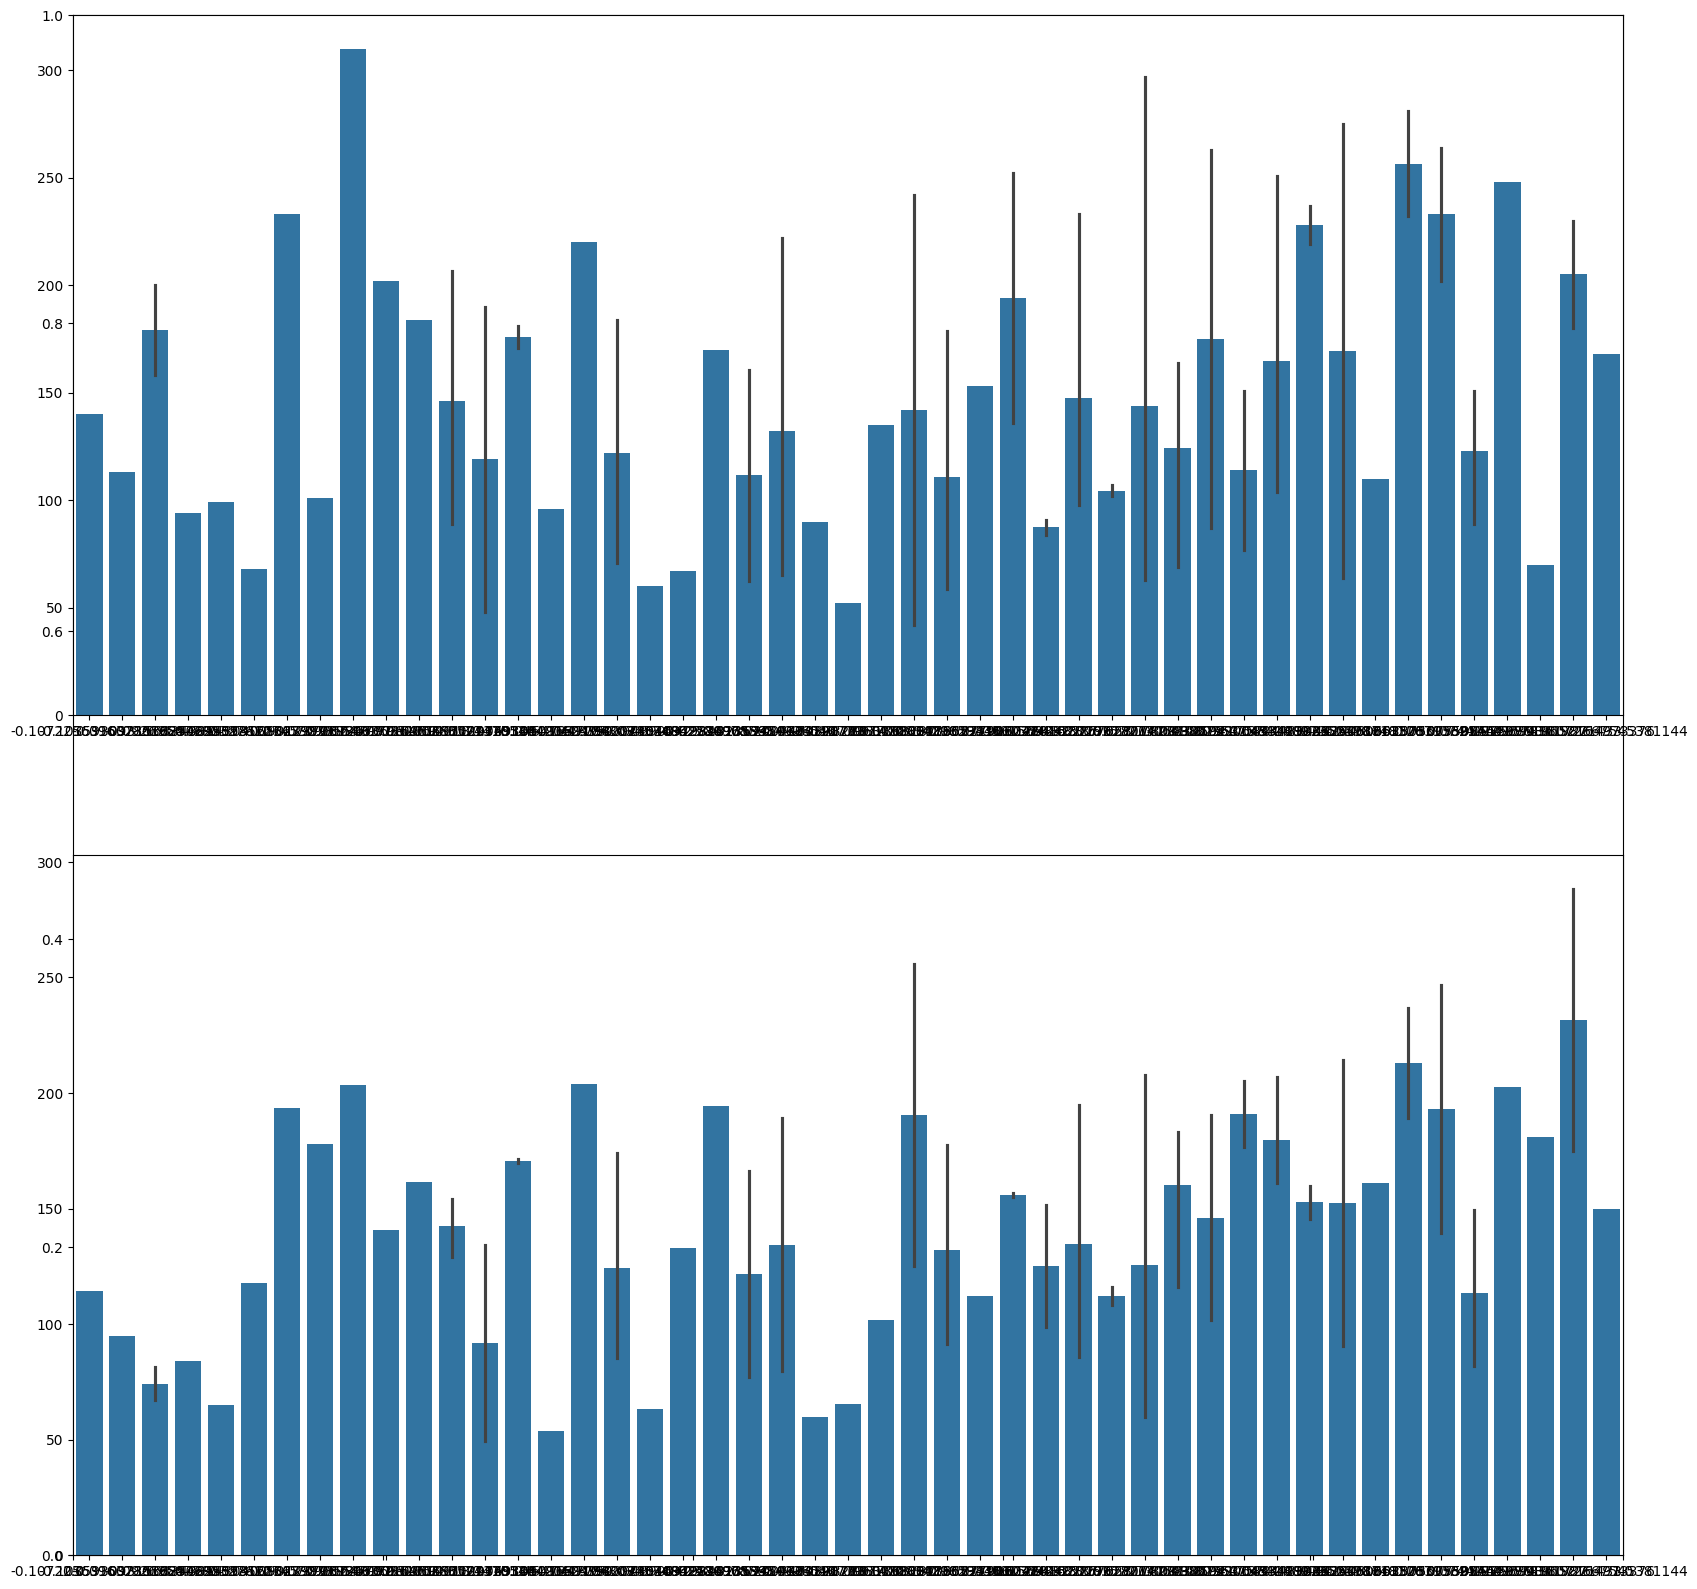

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))

plt.subplot(2,1,1)
sns.barplot(x=x_test[:,0],y=y_test)

plt.subplot(2,1,2)
sns.barplot(x=x_test[:,0],y=y_pred)

In [ ]:
x_test[:,0]

array([ 0.04534098,  0.09256398,  0.06350368,  0.09619652,  0.01264814,
        0.0090156 , -0.00914709, -0.02367725, -0.09269548, -0.06000263,
       -0.04183994,  0.00538306, -0.08906294,  0.01991321, -0.01277963,
       -0.03457486,  0.04170844,  0.06350368, -0.03094232,  0.04897352,
       -0.07090025,  0.04897352, -0.04183994,  0.05987114, -0.06000263,
        0.04170844,  0.03081083,  0.03807591, -0.05637009,  0.01628068,
        0.02717829, -0.10359309, -0.00188202,  0.02717829,  0.09619652,
       -0.07816532, -0.00914709, -0.00188202,  0.06713621,  0.01991321,
       -0.00188202,  0.06713621,  0.04170844,  0.11072668,  0.04170844,
       -0.01641217, -0.09632802,  0.03081083, -0.02004471, -0.06000263,
        0.00538306, -0.09632802,  0.02717829,  0.01991321, -0.05273755,
       -0.02730979, -0.02367725,  0.03807591, -0.02730979, -0.0382074 ,
       -0.02367725, -0.04183994, -0.06000263,  0.01628068, -0.04183994,
        0.07440129, -0.05273755,  0.05260606, -0.10722563, -0.06

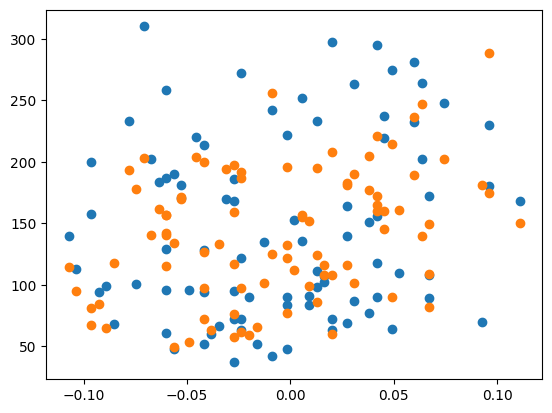

In [ ]:
plt.scatter(x_test[:,0],y_test)
plt.scatter(x_test[:,0],y_pred)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_pred_lr,y_test)

2900.2541204090467